In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sleep_stats = pd.read_csv("../content/drive/My Drive/Colab Notebooks/sleep_stats.csv")
sleep_score = pd.read_csv("../content/drive/My Drive/Colab Notebooks/sleep_score.csv").iloc[:,:2]
sleep_stats.head()

,Sleep,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
1,2020-07-01 10:05PM,2020-07-02 6:23AM,456,42,37,498,94,271,91
2,2020-06-30 9:43PM,2020-07-01 6:03AM,412,88,32,500,79,208,125
3,2020-06-29 10:03PM,2020-06-30 5:57AM,412,61,26,473,91,242,79
4,2020-06-28 11:24PM,2020-06-29 6:05AM,342,59,26,401,71,196,75


In [4]:
sleep_score.head()

,timestamp,overall_score
0,2020-07-02T06:23:30Z,86
1,2020-07-01T06:03:30Z,77
2,2020-06-30T05:57:00Z,78
3,2020-06-29T06:05:00Z,76
4,2020-06-28T09:20:30Z,82


In [5]:
#make the sleep_stats columns at location 0
sleep_stats.columns = sleep_stats.iloc[0]
#Drop the row at index 0
sleep_stats.drop(sleep_stats.index[0],inplace=True)

In [6]:
sleep_stats.head()

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
1,2020-07-01 10:05PM,2020-07-02 6:23AM,456,42,37,498,94,271,91
2,2020-06-30 9:43PM,2020-07-01 6:03AM,412,88,32,500,79,208,125
3,2020-06-29 10:03PM,2020-06-30 5:57AM,412,61,26,473,91,242,79
4,2020-06-28 11:24PM,2020-06-29 6:05AM,342,59,26,401,71,196,75
5,2020-06-27 10:42PM,2020-06-28 9:20AM,530,108,39,638,98,305,127


In [7]:
#getting the Info summery
sleep_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 1 to 322
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Start Time            322 non-null    object
 1   End Time              322 non-null    object
 2   Minutes Asleep        322 non-null    object
 3   Minutes Awake         322 non-null    object
 4   Number of Awakenings  322 non-null    object
 5   Time in Bed           322 non-null    object
 6   Minutes REM Sleep     287 non-null    object
 7   Minutes Light Sleep   287 non-null    object
 8   Minutes Deep Sleep    287 non-null    object
dtypes: object(9)
memory usage: 25.2+ KB


In [8]:
#Take look at null values
sleep_stats[sleep_stats['Minutes REM Sleep'].isna()].head()

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
77,2020-04-16 2:09PM,2020-04-16 3:27PM,76,2,0,78,NaN,NaN,NaN
103,2020-03-22 1:47PM,2020-03-22 3:21PM,83,1,1,93,NaN,NaN,NaN
115,2020-03-11 4:19PM,2020-03-11 5:24PM,55,6,1,65,NaN,NaN,NaN
121,2020-03-06 3:40PM,2020-03-06 4:40PM,53,7,0,60,NaN,NaN,NaN
134,2020-02-23 2:28PM,2020-02-23 3:42PM,68,5,0,74,NaN,NaN,NaN


In [9]:
#drop this NA values which reffer to Power Naps 
sleep_stats.dropna(axis=0,inplace=True)
sleep_stats.describe().transpose()

,count,unique,top,freq
0,,,,
Start Time,287,287,2019-09-04 10:20PM,1
End Time,287,287,2020-03-03 8:21AM,1
Minutes Asleep,287,168,505,6
Minutes Awake,287,75,66,13
Number of Awakenings,287,33,35,23
Time in Bed,287,174,512,7
Minutes REM Sleep,287,99,95,9
Minutes Light Sleep,287,151,263,6
Minutes Deep Sleep,287,89,107,10


In [10]:
#convert the object columns into float
columns_to_convert = sleep_stats.columns[2:]
sleep_stats[columns_to_convert] = sleep_stats[columns_to_convert].astype(float)

In [11]:
sleep_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 1 to 322
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Start Time            287 non-null    object 
 1   End Time              287 non-null    object 
 2   Minutes Asleep        287 non-null    float64
 3   Minutes Awake         287 non-null    float64
 4   Number of Awakenings  287 non-null    float64
 5   Time in Bed           287 non-null    float64
 6   Minutes REM Sleep     287 non-null    float64
 7   Minutes Light Sleep   287 non-null    float64
 8   Minutes Deep Sleep    287 non-null    float64
dtypes: float64(7), object(2)
memory usage: 22.4+ KB


In [12]:
#now time for the second dataframe
sleep_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   timestamp      286 non-null    object
 1   overall_score  286 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ KB


In [13]:
#combining the these two dataframes into single one
sleep_stats['Date'] = sleep_stats['End Time'].apply(lambda X: X[:10])
sleep_score['Date'] = sleep_score['timestamp'].apply(lambda X: X[:10])
#merge data
joining_data= sleep_stats.merge(sleep_score,on="Date", how="left")
#Drop redundant column
sleep_stats=joining_data.drop(columns=['End Time', 'timestamp', 'Date', 'Number of Awakenings'])

#Drop the NA values
sleep_stats.dropna(axis=0,inplace= True)
sleep_stats.head()

,Start Time,Minutes Asleep,Minutes Awake,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,overall_score
0,2020-07-01 10:05PM,456.0,42.0,498.0,94.0,271.0,91.0,86.0
1,2020-06-30 9:43PM,412.0,88.0,500.0,79.0,208.0,125.0,77.0
2,2020-06-29 10:03PM,412.0,61.0,473.0,91.0,242.0,79.0,78.0
3,2020-06-28 11:24PM,342.0,59.0,401.0,71.0,196.0,75.0,76.0
4,2020-06-27 10:42PM,530.0,108.0,638.0,98.0,305.0,127.0,82.0


In [14]:
sleep_stats.drop('Start Time',axis=1,inplace=True)

In [15]:
 sleep_stats.head()

,Minutes Asleep,Minutes Awake,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,overall_score
0,456.0,42.0,498.0,94.0,271.0,91.0,86.0
1,412.0,88.0,500.0,79.0,208.0,125.0,77.0
2,412.0,61.0,473.0,91.0,242.0,79.0,78.0
3,342.0,59.0,401.0,71.0,196.0,75.0,76.0
4,530.0,108.0,638.0,98.0,305.0,127.0,82.0


Exploratory Data Analysis

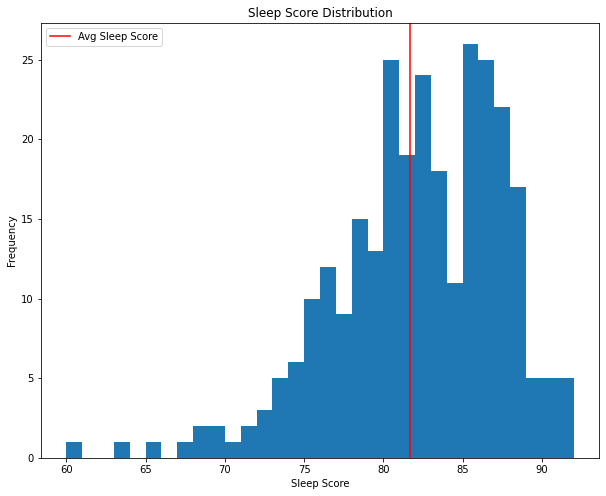

In [16]:
#lets look at sleep distribution
spread =int(max(sleep_stats.overall_score)- min(sleep_stats.overall_score))

#plot the histogram
plt.figure(figsize=(10,8))
plt.hist(sleep_stats.overall_score,bins =spread)
plt.axvline(sleep_stats.overall_score.mean(),color='r',label ="Avg Sleep Score")
plt.xlabel('Sleep Score')
plt.ylabel('Frequency')
plt.title('Sleep Score Distribution')
plt.legend()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


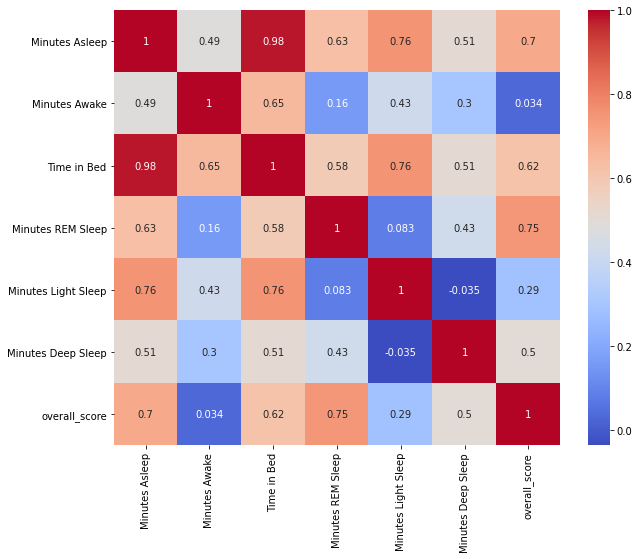

In [17]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(sleep_stats.corr(),annot=True,cmap='coolwarm')

In [18]:
def plot_scatter(df,num_cols):
  variable = df.columns
  dep_var = variable[-1]
  ind_var = variable
  figs = len(ind_var)
  num_columns = num_cols
  num_rows = round(figs / num_columns) + 1
  fig =1
  plt.figure(figsize=(20,30))
  for i in ind_var:
    pltfig = [str(num_rows),str(num_columns), str(fig)]
    pltfigure = int(''.join(pltfig))
    plt.subplot(pltfigure)
    plt.scatter(df[i],df[dep_var])
    plt.xlabel(str(i))
    plt.ylabel(str(dep_var))
    fig+=1


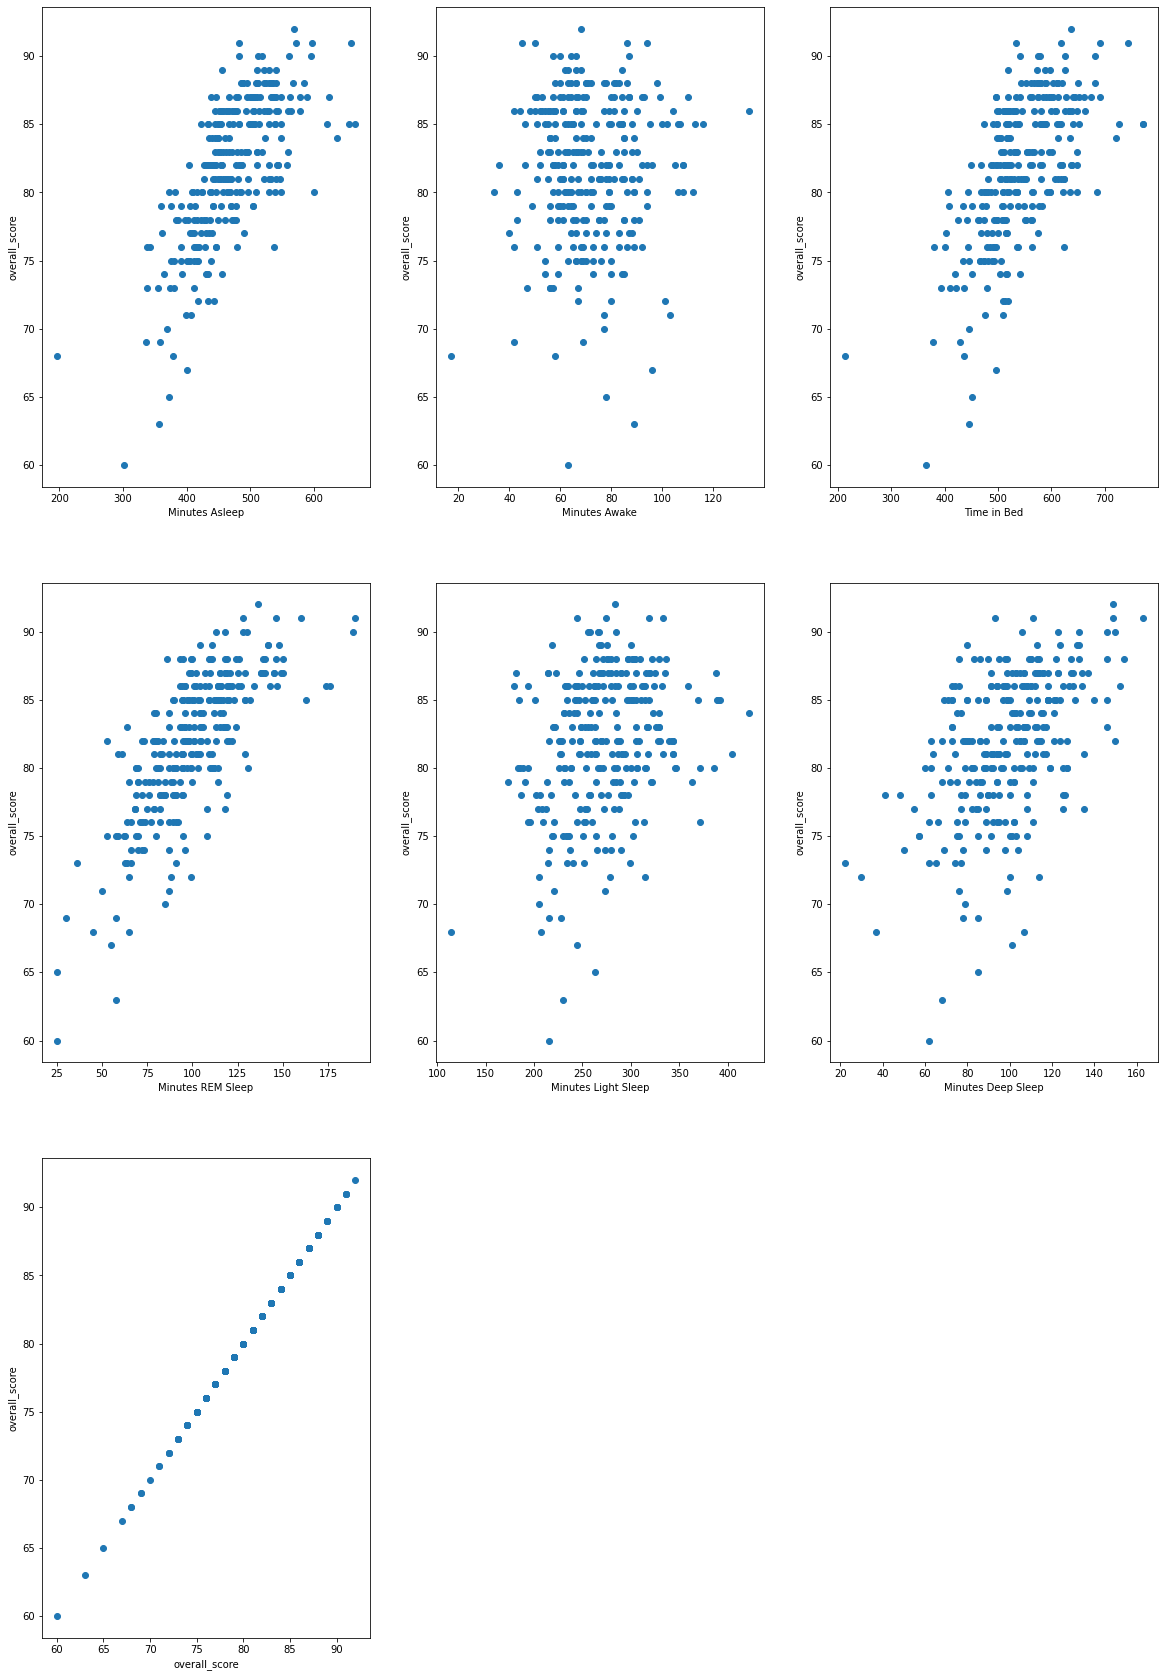

In [19]:
plot_scatter(sleep_stats,3)

Splitting the data into train and test set

In [20]:
from sklearn.model_selection import train_test_split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(sleep_stats.iloc[:,:-1], 
                                                              sleep_stats['overall_score'], 
                                                              test_size=0.2, 
                                                              random_state=42)

# Perform the second split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_temp, y_train_temp, 
                                                      test_size=0.25, random_state=42)

Scaling features,defining performance metrics and a baseline

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(X_train)

#Transforming the validation and test features
scaler.transform(X_valid)
scaler.transform(X_test)

array([[ 0.47416413,  0.32      ,  0.45801527,  0.53125   ,  0.44032922,
         0.49193548],
       [ 0.71732523,  0.11      ,  0.60814249,  0.725     ,  0.63374486,
         0.50806452],
       [ 0.23100304,  0.33      ,  0.25699746,  0.38125   ,  0.49382716,
        -0.06451613],
       [ 0.21276596,  0.3       ,  0.23409669,  0.4375    ,  0.21399177,
         0.36290323],
       [ 0.24924012,  0.67      ,  0.35877863,  0.43125   ,  0.10699588,
         0.67741935],
       [ 0.11246201,  0.44      ,  0.18575064, -0.03125   ,  0.34567901,
         0.44354839],
       [ 0.62006079,  0.51      ,  0.62849873,  0.525     ,  0.59670782,
         0.58064516],
       [ 0.70212766,  0.48      ,  0.68956743,  0.55      ,  0.51028807,
         0.93548387],
       [ 0.17021277,  0.17      ,  0.1653944 ,  0.2625    ,  0.12345679,
         0.65322581],
       [ 0.39209726,  0.36      ,  0.39949109,  0.50625   ,  0.35802469,
         0.46774194],
       [ 0.38297872,  0.33      ,  0.38422392,  0.

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [23]:
#Evaluate the model performance
def scoring(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}.'.format(mae))
    print('Mean Squared Error: {:0.4f}.'.format(mse))
    print('R^2 Score = {:0.4f}.'.format(r2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

Baseline Performance

In [24]:
#Create list of median predictions that has same length as y_valid
baseline_y = [y_train.median()] * len(y_valid)

#Compute the relevent score 
base_predictions = baseline_y
base_mae =  mean_absolute_error(y_valid, base_predictions)
base_mse = mean_squared_error(y_valid, base_predictions)
base_r2 = r2_score(y_valid, base_predictions)
base_errors = abs(base_predictions - y_valid)
base_mape = 100 * np.mean(base_errors / y_valid)
base_accuracy = 100 - base_mape 
print('Model Performance')
print('Mean Absolute Error: {:0.4f}.'.format(base_mae))
print('Mean Squared Error: {:0.4f}.'.format(base_mse))
print('R^2 Score = {:0.4f}.'.format(base_r2))
print('Accuracy = {:0.2f}%.'.format(base_accuracy))

Model Performance
Mean Absolute Error: 5.4912.
Mean Squared Error: 47.9474.
R^2 Score = -0.1037.
Accuracy = 92.68%.


Feature Selection 

Text(0, 0.5, 'Coefficient')

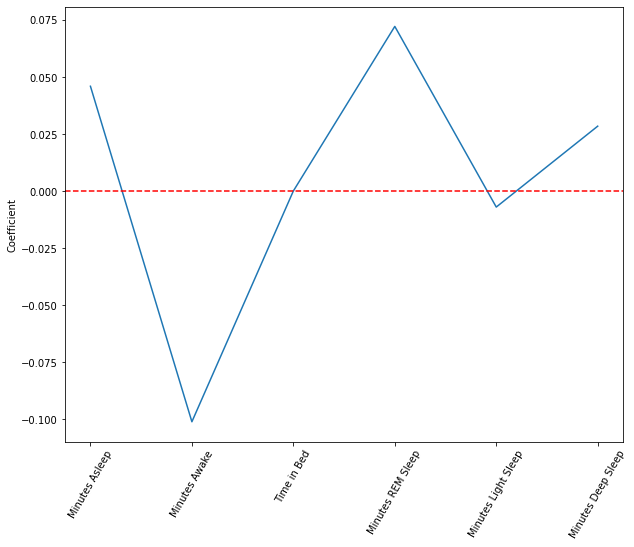

In [25]:
from sklearn.linear_model import Lasso 
lasso = Lasso(alpha=0.1)


#fit the model to the training data
lasso.fit(X_train, y_train)
#Extract Lasso coeffieciet
lasso_coef = lasso.coef_

#Plot the coefficient
plt.figure(figsize=(10,8))
plt.plot(range(len(X_train.columns)), lasso_coef)
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=60)
plt.axhline(0.0,linestyle='--',color='r')
plt.ylabel('Coefficient')

In [26]:
col_to_drop= ['Time in Bed','Minutes Light Sleep']

#Drop these columns from our train and test data

X_train.drop(columns = col_to_drop, axis=1,inplace=True)
X_test.drop(columns=col_to_drop, axis=1, inplace=True)
X_valid.drop(columns= col_to_drop,axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
X_train_temp.drop(columns=col_to_drop,axis=1,inplace=True)

Multiple Linear Regression

In [28]:
#create Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#fit MLR model to training data
mlr_model  =regressor.fit(X_train,y_train)

In [29]:
scoring(mlr_model,X_train,y_train)

Model Performance
Mean Absolute Error: 2.0689.
Mean Squared Error: 6.9474.
R^2 Score = 0.6629.
Accuracy = 97.46%.


In [30]:
#Creating regression stats
import statsmodels.api as sm
X_mlr= sm.add_constant(X_train)
est =sm.OLS(y_train,X_mlr)
est2=est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          overall_score   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     81.60
Date:                Sat, 22 Aug 2020   Prob (F-statistic):           3.60e-38
Time:                        11:21:51   Log-Likelihood:                -408.37
No. Observations:                 171   AIC:                             826.7
Df Residuals:                     166   BIC:                             842.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 59.5066      1.614     36.864      0.000      56.319      62.694
Minutes Asleep         0.0389      0.005      7.925      0.000       0.029       0.049
Minutes Awake         -0.1018      0.015     -6.847      0.000      -0.131      -0.072
Minutes REM Sleep      0.0793      0.011      7.307      0.000       0.058       0.101
Minutes Deep Sleep     0.0357      0.011      3.395      0.001       0.015       0.056
==============================================================================
Omnibus:                        9.143   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.051
Skew:                          -0.535   Prob(JB):                       0.0108
Kurtosis:                       3.355   Cond. No.                     3.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Random Forest Regression

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

#fit the model on train and test data
rf_regressor.fit(X_train,y_train)

scoring(rf_regressor,X_train,y_train)

Model Performance
Mean Absolute Error: 0.7824.
Mean Squared Error: 1.0274.
R^2 Score = 0.9501.
Accuracy = 99.03%.


In [32]:
#Create the DataFrame of the Feature  importance
rf_feat =pd.DataFrame(rf_regressor.feature_importances_,index=X_train.columns,columns=['Feature Importance'])
rf_feat

,Feature Importance
Minutes Asleep,0.479255
Minutes Awake,0.111434
Minutes REM Sleep,0.326952
Minutes Deep Sleep,0.082359


Extreme Gradient Boosting

In [33]:
from xgboost import XGBRegressor
xg_regressor = XGBRegressor(random_state=42)
xgb = xg_regressor.fit(X_train,y_train)

[11:21:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [34]:
scoring(xgb,X_train,y_train)

Model Performance
Mean Absolute Error: 0.9360.
Mean Squared Error: 1.4897.
R^2 Score = 0.9277.
Accuracy = 98.85%.


Cross validation

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [36]:
mlr_reg= LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
xgb_reg = XGBRegressor(random_state=42) 

In [37]:
#putting the model in list to use in cv 
models = [mlr_reg, rf_reg, xgb_reg]


In [38]:
#Define the function for cv and comparing the model
def cv_comparision(models, X, y, cv):
  cv_accuracies = pd.DataFrame()
  maes = []
  mses = []
  r2s = []
  accss = []

  #looping to cv and adding the average of each model score into the DataFrame
  for model in models:
    mae =-np.round(cross_val_score(model,X, y, scoring='neg_mean_absolute_error',cv=cv),4)
    maes.append(mae)
    mae_avg = round(mae.mean(),4)
    mse =-np.round(cross_val_score(model,X ,y,scoring='neg_mean_squared_error',cv=cv),4)
    mses.append(mse)
    mse_avg = round(mse.mean(),4)
    r2 = np.round(cross_val_score(model,X,y,scoring='r2',cv=cv),4)
    r2s.append(r2)
    r2_avg = round(r2.mean(),4)
    acc = np.round((100 -(100 * (mae * len(X)))/ sum(y)),4)
    accss.append(acc)
    acc_avg = round(acc.mean(),4)
    cv_accuracies[str(model)] = [mae_avg,mse_avg,r2_avg,acc_avg]
  cv_accuracies.index =['Mean absolute Error','Mean Squared Error', 'R^2','Accuracy']
  return cv_accuracies,maes,mses,r2s,accss

In [39]:
comp, maes, mses, r2s, accs = cv_comparision(models, X_train_temp, y_train_temp, 4)

[11:22:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:22:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:22:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:22:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:22:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:22:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:22:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:22:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [40]:
comp.columns =['Multiple Linear Regression', 'Random Forest', 'Gradient Boosting']
comp

,Multiple Linear Regression,Random Forest,Gradient Boosting
Mean absolute Error,2.2869,2.1735,2.3494
Mean Squared Error,8.3989,7.8714,9.3883
R^2,0.6882,0.7011,0.6434
Accuracy,97.1982,97.3371,97.1216


In [41]:
r2_comp =pd.DataFrame(r2s,index=comp.columns, columns=['1st Fold','2nd Fold','3rd Fold','4th Fold'])
r2_comp['Average']= np.round(r2_comp.mean(axis=1),4)
r2_comp

,1st Fold,2nd Fold,3rd Fold,4th Fold,Average
Multiple Linear Regression,0.6750,0.6722,0.7003,0.7053,0.6882
Random Forest,0.5632,0.7025,0.7939,0.7449,0.7011
Gradient Boosting,0.5108,0.6922,0.6410,0.7296,0.6434


Hyperparaters Tuning 

In [48]:
#number of trees in random forest
rf_n_estimeters = [int(x) for x in np.linspace(200,1000,5)]
rf_n_estimeters.append(1500)
rf_n_estimeters.append(2000)

#Max number of levels in tree
rf_max_level = [int(x) for x in np.linspace(5,55,11)]
rf_max_level.append(None)

#Number of features to consider at every split
rf_max_features = ['auto','sqrt','log2']

#Criterion to split on
rf_criterion = ['mse','mae']

#Min number of samples required to split a node
rf_min_sample_split = [int(x) for x in np.linspace(2,10,9)]

#Min decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0,0.05,0.1]

#Method of selection sample for training such tree
rf_bootstrap = [True, False]

In [50]:
#Create the grid 
rf_grid ={'n_estimators': rf_n_estimeters,
          'max_depth':rf_max_level,
          'max_features':rf_max_features,
          'criterion':rf_criterion,
          'min_samples_split':rf_min_sample_split,
          'min_impurity_decrease':rf_min_impurity_decrease,
          'bootstrap':rf_bootstrap}
rf_grid

{'bootstrap': [True, False],
 'criterion': ['mse', 'mae'],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_impurity_decrease': [0.0, 0.05, 0.1],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1500, 2000]}

In [51]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [53]:
#create model  to be tuned
rf_base = RandomForestRegressor()
rf_random =RandomizedSearchCV(estimator=rf_base,param_distributions=rf_grid,
                              n_iter=200,cv=3,verbose=2, random_state=42,n_jobs = -1)
#fit the model 
rf_random.fit(X_train_temp, y_train_temp)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 11.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [57]:
rf_random.best_params_

{'bootstrap': True,
 'criterion': 'mae',
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_impurity_decrease': 0.0,
 'min_samples_split': 3,
 'n_estimators': 200}

In [58]:
rf_random.best_score_

0.7187221000099034

Hyperparameter tuning for Extreme Gradient Boosting


In [54]:
#Number of trees to be used
xgb_n_estimeters = [int(x) for x in np.linspace(200,2000,10)]

#Max number of level in tree
xgb_max_depth = [int(x) for x in np.linspace(2,20,10)]

#Minimum number of instance needed in each node
xgb_min_child_weight = [int(x) for x in np.linspace(1,10,10)]

#Tree construction algorithm used in XGBoost
xgb_tree_method = ['auto', 'exact', 'approx', 'hist', 'gpu_hist']

# Learning rate
xgb_eta = [x for x in np.linspace(0.1, 0.6, 6)]

# Minimum loss reduction required to make further partition
xgb_gamma = [int(x) for x in np.linspace(0, 0.5, 6)]

# Learning objective used
xgb_objective = ['reg:squarederror', 'reg:squaredlogerror']

In [56]:
#Create Grid
xgb_grid = {'n_estimators': xgb_n_estimeters,
            'max_depth': xgb_max_depth,
            'min_child_weight': xgb_min_child_weight,
            'tree_method': xgb_tree_method,
            'eta': xgb_eta,
            'gamma': xgb_gamma,
            'objective': xgb_objective}
xgb_grid

{'eta': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6],
 'gamma': [0, 0, 0, 0, 0, 0],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'objective': ['reg:squarederror', 'reg:squaredlogerror'],
 'tree_method': ['auto', 'exact', 'approx', 'hist', 'gpu_hist']}

In [60]:
#Create the model to be tuned
xgb_base = XGBRegressor()

#Create grid
xgb_random = RandomizedSearchCV(estimator=xgb_base,param_distributions=xgb_grid,n_iter=200,
                                cv=3,verbose=2,random_state=42,n_jobs= -1)
xgb_random.fit(X_train_temp,y_train_temp)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 474 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   36.4s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20],
                                        'mi

In [61]:
xgb_random.best_params_

{'eta': 0.30000000000000004,
 'gamma': 0,
 'max_depth': 20,
 'min_child_weight': 6,
 'n_estimators': 200,
 'objective': 'reg:squarederror',
 'tree_method': 'hist'}

In [62]:
xgb_random.best_score_

0.6858203652299988

Finally use in test_data

In [63]:
# Create the final multiple linear regression
mlr_final = LinearRegression()

# Create the final Random Forest
rf_final = RandomForestRegressor(n_estimators = 200,
                                 min_samples_split = 6,
                                 min_impurity_decrease = 0.0,
                                 max_features = 'sqrt',
                                 max_depth = 25,
                                 criterion = 'mae',
                                 bootstrap = True,
                                 random_state = 42)

In [64]:
# Create the fnal Extreme Gradient Booster
xgb_final = XGBRegressor(tree_method = 'exact',
                         objective = 'reg:squarederror',
                         n_estimators = 1600,
                         min_child_weight = 6,
                         max_depth = 8,
                         gamma = 0,
                         eta = 0.1,
                         random_state = 42)

In [65]:

# Train the models using 80% of the original data
mlr_final.fit(X_train_temp, y_train_temp)
rf_final.fit(X_train_temp, y_train_temp)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=25, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [66]:
# Train the final XGB using 80% of the original data
xgb_final.fit(X_train_temp, y_train_temp)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=6, missing=None, n_estimators=1600,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, tree_method='exact',
             verbosity=1)

In [67]:

# Define a function that compares all final models
def final_comparison(models, test_features, test_labels):
    scores = pd.DataFrame()
    for model in models:
        predictions = model.predict(test_features)
        mae = round(mean_absolute_error(test_labels, predictions), 4)
        mse = round(mean_squared_error(test_labels, predictions), 4)
        r2 = round(r2_score(test_labels, predictions), 4)
        errors = abs(predictions - test_labels)
        mape = 100 * np.mean(errors / test_labels)
        accuracy = round(100 - mape, 4)
        scores[str(model)] = [mae, mse, r2, accuracy]
    scores.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return scores

In [68]:
# Call the comparison function with the three final models
final_scores = final_comparison([mlr_final, rf_final, xgb_final], X_test, y_test)
final_scores.columns  = ['Linear Regression', 'Random Forest', 'Extreme Gradient Boosting']
final_scores

,Linear Regression,Random Forest,Extreme Gradient Boosting
Mean Absolute Error,1.9623,1.9289,2.2957
Mean Squared Error,6.4451,6.0976,9.9338
R^2,0.7888,0.8002,0.6745
Accuracy,97.5790,97.6145,97.1306
